In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data = pd.read_csv('sms_spam.csv')
data

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [5]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [9]:
data.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [13]:
data.value_counts()

type  text                                                                                                                                                                                                                                 
ham   Sorry, I'll call later                                                                                                                                                                                                                   30
      I cant pick the phone right now. Pls send a message                                                                                                                                                                                      12
      Ok...                                                                                                                                                                                                                                    10
      Your opinion about me? 1. Over 2

In [17]:
data.dtypes

type    object
text    object
dtype: object

In [19]:
data.isnull().sum()

type    0
text    0
dtype: int64

In [33]:
d1 = data['type'].value_counts()
d1

type
ham     4812
spam     747
Name: count, dtype: int64

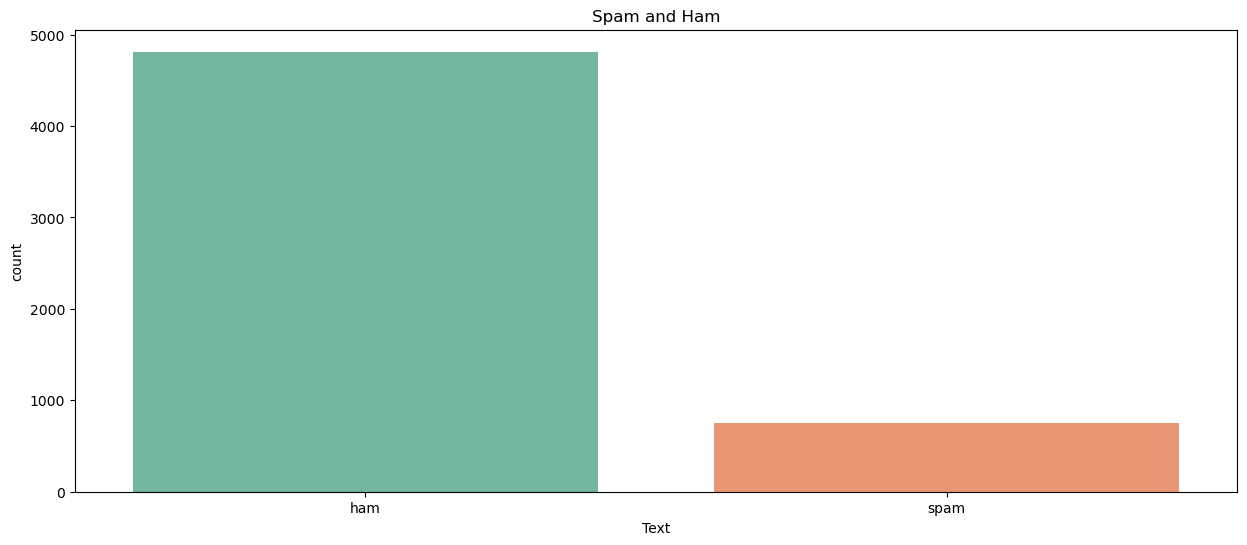

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(x='type', data=data, order=data['type'].value_counts().index, palette='Set2')
plt.title('Spam and Ham')
plt.xlabel('Text')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [41]:
data['type'] = data['type'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['type'], test_size=0.2, random_state=42)

In [45]:
# Text Vectorization
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [47]:
# Train Model
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [49]:
# Make Predictions
predictions = classifier.predict(X_test_vectorized)

In [51]:
# Evaluate Model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.9820143884892086
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       963
           1       0.96      0.90      0.93       149

    accuracy                           0.98      1112
   macro avg       0.97      0.95      0.96      1112
weighted avg       0.98      0.98      0.98      1112



In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_vectorized,y_train)

RandomForestClassifier()

In [67]:
y_pred=rfc.predict(X_test_vectorized)
print("Accuracy is:\n", accuracy_score (y_test,y_pred))
print("Classification Report is:\n", classification_report (y_test,y_pred))

Accuracy is:
 0.9739208633093526
Classification Report is:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       963
           1       0.98      0.82      0.89       149

    accuracy                           0.97      1112
   macro avg       0.98      0.91      0.94      1112
weighted avg       0.97      0.97      0.97      1112



In [71]:
user_input = input('Enter SMS Message: ')
user_input_vectorized = vectorizer.transform([user_input])
prediction = classifier.predict(user_input_vectorized)
if prediction[0] == 1:
    print(' Hey! It is a Spam SMS..!')
else:
    print('Dont worry! It is a Non-Spam SMS..!')

Enter SMS Message:  Hii Nice to meet you


Dont worry! It is a Non-Spam SMS..!
